<a href="https://colab.research.google.com/github/maheshboj/agenticai_basics/blob/Langchain_components/LangGraph_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph1 --> Understand AgentState


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <title>Objectives</title>
  <meta name="viewport" content="width=device-width, initial-scale=1" />
  <style>
    body { font-family: system-ui, -apple-system, Segoe UI, Roboto, Arial, sans-serif; margin: 2rem; color: #111; }
    h1 { font-size: 1.75rem; margin-bottom: 0.75rem; }
    .badge { display: inline-block; background: #16a34a; color: #fff; border-radius: 0.5rem; padding: 0.15rem 0.5rem; font-size: 0.9rem; margin-left: 0.5rem; }
    ul { line-height: 1.6; margin-top: 1rem; }
    li { margin: 0.4rem 0; }
    code { background: #f5f5f5; padding: 0.1rem 0.25rem; border-radius: 0.25rem; }
  </style>
</head>
<body>
  <h1>Objectives <span class="badge" aria-label="Completed">✅</span></h1>
  <ul>
    <li>Understand and define the <code>AgentState</code> structure</li>
    <li>Create simple node functions to process and update state</li>
    <li>Set up a basic LangGraph structure</li>
    <li>Compile and invoke a LangGraph graph</li>
    <li>Understand how data flows through a single-node in LangGraph</li>
  </ul>
</body>
</html>

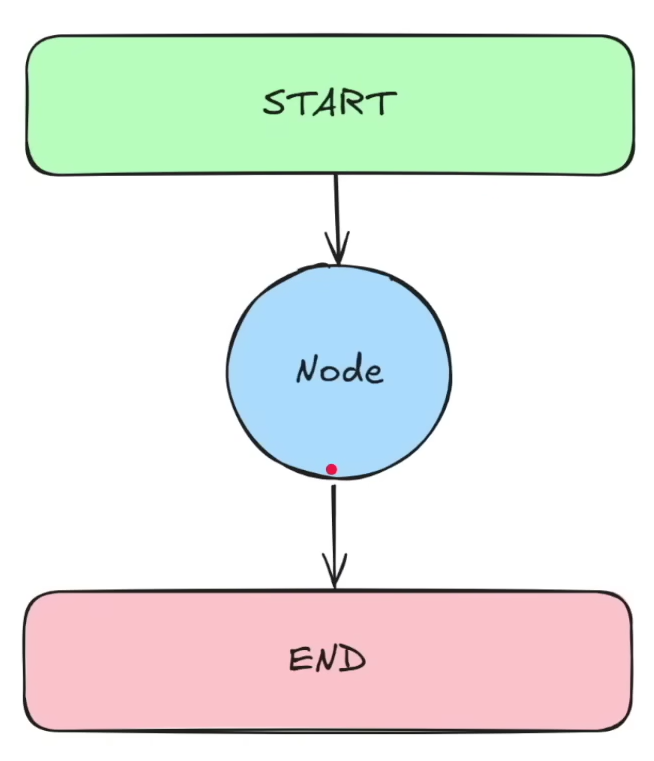

In [ ]:
%pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.80
    Uninstalling langchain-core-0.3.80:
      Successfully uninstalled langchain-core-0.3.80
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.1.0 which is incompatible.


In [ ]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph,START,END

In [ ]:
class AgentState(TypedDict):
  message: str

In [ ]:
def greet_node(state: AgentState) -> AgentState:
  """Simple Node to add a greeting message to a State"""
  state["message"] = "Hey" + state["message"] + "How are you?"
  return state

In [ ]:
graph=StateGraph(AgentState)
graph.add_node("greet_node",greet_node)
graph.add_edge(START,"greet_node")
graph.add_edge("greet_node",END)

In [ ]:
app = graph.compile()

In [ ]:
response = app.invoke({"message":" Mahesh! "})
print(response)

{'message': 'Hey Mahesh! How are you?'}


In [ ]:
from IPython.display import Image,display

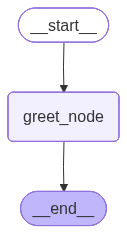

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

# Graph 2

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Simple Flowchart</title>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/viz.js/2.1.2/viz.js"></script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/viz.js/2.1.2/full.render.js"></script>
  <style>
    body {
      font-family: Arial, sans-serif;
      background: #f4f4f4;
      padding: 30px;
    }
    #graph {
      text-align: center;
      margin-top: 40px;
    }
  </style>
</head>
<body>
  <h1>Simple Flowchart: START → Node → END</h1>
  <div id="graph"></div>

  <script>
    const dot = `
      digraph G {
        rankdir=TB;
        node [fontname="Arial", fontsize=14];

        START [shape=ellipse, style=filled, fillcolor=lightgreen];
        Node [shape=circle, style=filled, fillcolor=lightblue];
        END [shape=ellipse, style=filled, fillcolor=lightpink];

        START -> Node;
        Node -> END;
      }
    `;

    const viz = new Viz();
    viz.renderSVGElement(dot)
      .then(function(element) {
        document.getElementById("graph").appendChild(element);
      })
      .catch(error => {
        document.getElementById("graph").innerHTML = "<p>Error rendering graph.</p>";
        console.error(error);
      });
  </script>
</body>
</html>


In [ ]:
from typing import Dict,TypedDict,List
from langgraph.graph import StateGraph,START,END

In [ ]:
class AgentState(TypedDict):
  values: List[int]
  name: str
  result: int

In [ ]:
def adder(state: AgentState) -> AgentState:
  state["result"] = sum(state["values"])
  return state

In [ ]:
graph=StateGraph(AgentState)
graph.add_node("adder",adder)
graph.set_entry_point('adder')
graph.set_finish_point('adder')

In [ ]:
app=graph.compile()

In [ ]:
app.invoke({"values":[20,1],"name":"Mahesh"})

{'values': [20, 1], 'name': 'Mahesh', 'result': 21}

Using Pydantic for State

In [ ]:
from pydantic import BaseModel

In [ ]:
from typing import Optional

class GraphState(BaseModel):
  values: List[int]
  name: str
  result: Optional[int] = None

In [ ]:
def processor(state: GraphState) -> GraphState:
  state.result = "hello {} the sum of values is : {}".format(state.name,sum(state.values))
  return state

In [ ]:
graph=StateGraph(GraphState)
graph.add_node("processor",processor)
graph.set_entry_point('processor')
graph.set_finish_point('processor')
app1=graph.compile()

In [ ]:
# Create input state
initial_state = GraphState(values=[1,2,3],name='Mahesh')

# Run the graph
final_state = app1.invoke(initial_state)


In [ ]:
final_state

{'values': [1, 2, 3],
 'name': 'Mahesh',
 'result': 'hello Mahesh the sum of values is : 6'}

In [ ]:
final_state['result']

'hello Mahesh the sum of values is : 6'

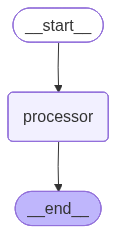

In [ ]:
from IPython.display import Image,display
display(Image(app1.get_graph().draw_mermaid_png()))

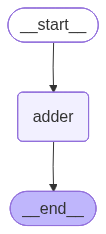

In [ ]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

# Graph3

In [ ]:
class AgentState(TypedDict):
  name: str
  age: str
  final: str

In [ ]:
def first_node(state: AgentState) -> AgentState:
  state["final"] = "Hi {} !".format(state["name"])
  return state

In [ ]:
def second_node(state: AgentState) -> AgentState:
  state['final'] = state['final'] + "you are {} years old".format(state["age"])
  return state

In [ ]:
graph=StateGraph(AgentState)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.add_edge("first_node","second_node")
graph.add_edge("second_node",END)
graph.add_edge(START,"first_node")
app=graph.compile()

In [ ]:
result=app.invoke({'name':'mahesh','age':'40'})

In [ ]:
result['final']

'Hi mahesh !you are 40 years old'

# Graph 4

 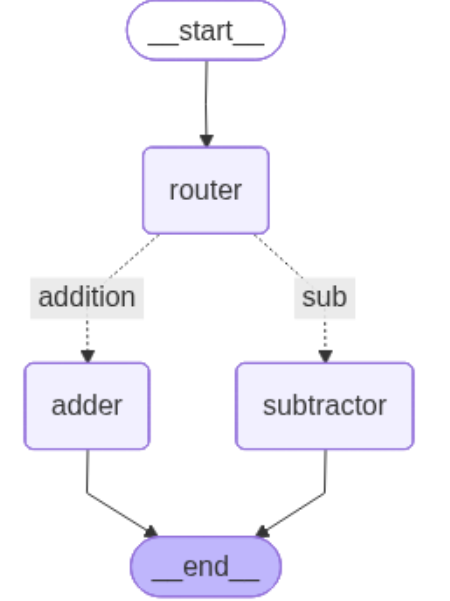

In [ ]:
from typing import Literal

In [ ]:
class AgentState(TypedDict):
  number1: int
  number2: int
  result: int
  operation: Literal['add','sub']

In [ ]:
def node1(state: AgentState) -> AgentState:
  state["result"] = state["number1"] + state["number2"]
  return state
def node2(state: AgentState) -> AgentState:
  state["result"] = state["number1"] - state["number2"]
  return state

In [ ]:
def find_next_node(state: AgentState) -> str:
  if state["operation"] == "add":
    return "addition"
  else:
    return "sub"

In [ ]:
graph=StateGraph(AgentState)

graph.add_node("adder",node1)
graph.add_node("subtractor",node2)
graph.add_node("router",lambda state:state)
graph.add_edge("adder",END)
graph.add_edge("subtractor",END)
graph.add_edge(START,"router")
graph.add_conditional_edges("router",find_next_node,{"addition":"adder","sub":"subtractor"})
app=graph.compile()

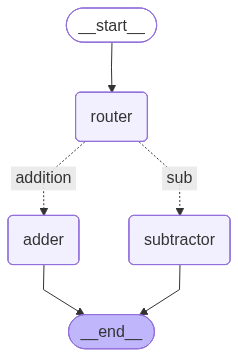

In [ ]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke({"number1":5,"number2":8,'operation':'add'})

{'number1': 5, 'number2': 8, 'result': 13, 'operation': 'add'}

In [ ]:
app.invoke({"number1":5,"number2":8,'operation':'sub'})

{'number1': 5, 'number2': 8, 'result': -3, 'operation': 'sub'}

# Agent 1

In [1]:
%pip install -qU langchian_openai langgraph

ERROR: Could not find a version that satisfies the requirement langchian_openai (from versions: none)
ERROR: No matching distribution found for langchian_openai


In [ ]:
import os
from langchain_openai import ChatOpenAI

In [ ]:
from langgraph import StateGraph

ImportError: cannot import name 'StateGraph' from 'langgraph' (unknown location)